
본 글에서는 인공신경망 분석을 통한 SMP가격예측을 해볼것이다. 인공신경망은 입력충,출력충간의 네트워크 관계를 분석해서 최적의 결과를 예측한다. 입력충과 출력충간의 하나의 출력함수밖에 없으면 이를 단층 신경망이라고 한다. 입력충과 출력충간의 중간단계가 있다면 이러한 중간단계를 은닉충(hidden layer)라고 하며 이를 다층 신경망이라고 한다. 입력충과 출력충사이는 출력함수로 연결되어 있다. 출력함수의 계수(coefficient)를 "연결강도"라고 한다. 출력함수는 정말로 다양한 함수가 있지만, 가장 많이 사용되는 함수가 시그모이드 함수(sigmoid function)이다. 시그모이드 함수는 S자 형태의 비선형 함수이고 수식은 아래와 같다. $\lambda$는 함수의 경사도(gradient)를 의미한다. 

$$ f(W)=\frac{1}{1+exp(\lambda(x))} $$

RNN(Recurrent Neural Network,순환인공신경망)은 이전의 결과를 반영한 신경망 분석이다. 때문에 시계열 분석에서 많이 쓰인다. 

In [58]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
 
os.chdir("/Users/youngji/Dropbox/data")
smp_price1=pd.read_csv("smp_price.csv",header=1,names=['육지(SMP)','제주(SMP)','SMP','BLMP'])
smp_price2=smp_price1.sort_index(axis=0, ascending=True)
smp_price3=smp_price2.set_index(keys=pd.period_range(start='2001-04',periods=smp_price2.shape[0],freq='M'))
smp_price4=smp_price3['SMP']

elec_supply1=pd.read_csv("elec_supply.csv",names=["기간","설비용량","공급능력","최대전력","공급예비력","공급예비율","기준시간"])
elec_supply2=elec_supply1.sort_values("기간", ascending=True)
elec_supply3=elec_supply2[elec_supply2.기간!='2002/08']
elec_supply4=elec_supply3.set_index(keys=pd.period_range(start='2003-01',periods=elec_supply3.shape[0],freq='M'))
elec_supply5=elec_supply4[['설비용량','공급능력','최대전력','공급예비력','공급예비율']]

fuel_cost1=pd.read_csv("fuel_cost.csv",header=0,names=["기간","원자력","유연탄","무연탄","유가","LNG가격"])
fuel_cost2=fuel_cost1.sort_values("기간", ascending=True)
fuel_cost3=fuel_cost2.set_index(keys=pd.period_range(start='2001-04',periods=fuel_cost2.shape[0],freq='M'))
fuel_cost4=fuel_cost3[['유가','LNG가격']]
fuel_cost4

elec_data=pd.concat([smp_price4,elec_supply5,fuel_cost4],axis=1)['2003-01':'2016-12']
elec_data['설비용량']=elec_data['설비용량'].str.replace(',', '') 
elec_data['공급능력']=elec_data['공급능력'].str.replace(',', '')
elec_data['최대전력']=elec_data['공급능력'].str.replace(',', '')
elec_data['공급예비력']=elec_data['공급예비력'].str.replace(',', '')
elec_data=elec_data.astype(float)
elec_data

,SMP,설비용량,공급능력,최대전력,공급예비력,공급예비율,유가,LNG가격
2003-01,73.52,5380.0,5248.0,5248.0,743.0,17.0,60.94,61.64
2003-02,74.70,5515.0,5080.0,5080.0,723.0,17.0,60.88,59.95
2003-03,104.52,5515.0,5171.0,5171.0,901.0,21.0,65.34,58.34
2003-04,75.70,5515.0,5004.0,5004.0,920.0,23.0,68.92,57.94
2003-05,119.89,5562.0,4729.0,4729.0,661.0,16.0,70.77,57.60
2003-06,117.09,5562.0,5161.0,5161.0,957.0,23.0,67.40,59.04
2003-07,160.94,5607.0,5581.0,5581.0,1278.0,30.0,65.86,58.91
2003-08,154.19,5608.0,5549.0,5549.0,810.0,17.0,63.20,55.22
2003-09,128.60,5608.0,5264.0,5264.0,776.0,17.0,60.92,60.13
2003-10,88.59,5605.0,5303.0,5303.0,1056.0,25.0,60.17,60.42


이제 본격적으로 RNN 함수를 도입할 것이다. SMP,유가,공급예비율간의 관계를 통해서 1년치 데이터를 예측해보고자 한다. 우선, 아래와 같이 데이터를 나누고 예측을 할 것이다. 

|Train|Test|
| :-------: | :-------: |
| 2004-15년 데이터| 2016년 데이터|

현재 train set을 그래프로 나타내면 아래와 같다.

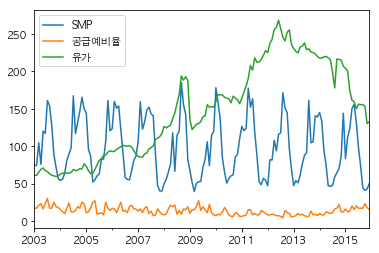

In [60]:
train_set=elec_data.loc['2003-01':'2015-12'][['SMP','공급예비율','유가']]
test_set=elec_data.loc['2016-01':'2016-12'][['SMP','공급예비율','유가']]
import matplotlib
matplotlib.rc('font', family="AppleGothic")  
train_set.plot()

In [77]:
x_train=pd.DataFrame.as_matrix(train_set[['공급예비율','유가']])
y_train=pd.DataFrame.as_matrix(train_set[['SMP']])
x_test=pd.DataFrame.as_matrix(test_set[['공급예비율','유가']])
y_test=pd.DataFrame.as_matrix(test_set[['SMP']])

x_train.shape,y_train.shape

((156, 2), (156, 1))

In [105]:
import numpy as np
from keras.models import Sequential 
from keras.layers import SimpleRNN, Dense

np.random.seed(0) 
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2))
model.compile(loss='mse', optimizer='sgd')
model.fit(x=x_train,y=y_train,epochs=10)
ans=model.predict(self,x=x_test)

Epoch 1/10
156/156 [==============================] - 0s - loss: 10866.4684     
Epoch 2/10
156/156 [==============================] - 0s - loss: 10866.4688     
Epoch 3/10
156/156 [==============================] - 0s - loss: 10866.4681     
Epoch 4/10
156/156 [==============================] - 0s - loss: 10866.4686     
Epoch 5/10
156/156 [==============================] - 0s - loss: 10866.4686    
Epoch 6/10
156/156 [==============================] - 0s - loss: 10866.4685     
Epoch 7/10
156/156 [==============================] - 0s - loss: 10866.4687    
Epoch 8/10
156/156 [==============================] - 0s - loss: 10866.4684     
Epoch 9/10
156/156 [==============================] - 0s - loss: 10866.4682     
Epoch 10/10
156/156 [==============================] - 0s - loss: 10866.4683     


NameError: name 'self' is not defined

In [106]:
ans

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)